<a href="https://colab.research.google.com/github/ekingit/DeepForecast/blob/main/1_2_Parameter_opt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from google.colab import drive

drive.mount('/content/gdrive')
!cp /content/gdrive/MyDrive/Colab\ Notebooks/weather_forecast/Data/data.py /content/data.py
!cp /content/gdrive/MyDrive/Colab\ Notebooks/weather_forecast/models.py /content/models.py
!cp /content/gdrive/MyDrive/Colab\ Notebooks/weather_forecast/train.py /content/train.py
from data import Sine_Data, Weather_Data
from models import LSTM_periodic
from train import train_test_LSTM

In [ ]:
data_loc = '/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Data/weather_prediction_dataset.csv'
data_column = 'BASEL_temp_max'
nat_data = Weather_Data(data_loc,data_column)
synt_data = Sine_Data(2/365.25,3654,3/2)
X_sine = synt_data.x.unsqueeze(-1)
X_raw = nat_data.tens
X_sine.shape, X_raw.shape

(torch.Size([3654, 1]), torch.Size([3654, 1]))

In [ ]:
#create an empty .csv to save the results
columns = ['model', 'hidden_size', 'num_layers', 'run_time', 'device','best_epoch', 'num_epoch',
           'test_loss','val_loss','train_loss']
df = pd.DataFrame(columns=columns)
res_loc = '/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic2/Hyperparameter_Performance_Analysis2.csv'
df.to_csv(res_loc, index=True)

In [ ]:
def main(hidden_size, num_layers, ind):
  num_epochs = 10000
  lr = 0.0001
  device = 'cuda'
  split_year = 8
  save_model_path = f'/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic2/model{ind}.pth'
  save_plot_path = f'/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic2/model{ind}.png'
  model_name = 'LSTM_periodic'

  model = LSTM_periodic(1,hidden_size,num_layers)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = nn.MSELoss()

  #RUN!
  train_loss_list = []
  val_loss_list = []
  test_loss_list = []
  best_loss = 0.6
  a = time.time()
  for epoch in range(num_epochs):
      train_loss, val_loss, test_loss = train_test_LSTM(model, X_sine, X_raw, split_year, optimizer, criterion, num_layers, hidden_size)
      if val_loss < best_loss:
          best_loss = val_loss
          best_test = test_loss
          best_train = train_loss
          best_epoch = epoch
          torch.save(model.state_dict(), save_model_path)
      train_loss_list.append(train_loss)
      val_loss_list.append(val_loss)
      test_loss_list.append(test_loss)
      if epoch %500 == 0:
              print(f"epoch: {epoch} train loss: {train_loss}, validation loss: {val_loss}")
  b = time.time()
  results = {'model':model_name, 'hidden_size':hidden_size, 'num_layers':num_layers}
  results['run_time'] = b-a
  results['device'] = 'T4_GPU'
  results['best_epoch'] = best_epoch
  results['num_epoch'] = num_epochs
  results['test_loss'] = test_loss
  results['val_loss'] = best_loss
  results['train_loss'] = best_train

  df1 = pd.DataFrame(results, index=[ind])
  df1.to_csv(res_loc, mode='a', header=False)

  train_loss_tens = torch.tensor(train_loss_list)
  val_loss_tens = torch.tensor(val_loss_list)
  test_loss_tens = torch.tensor(test_loss_list)
  plt.plot(train_loss_tens.numpy(),label='train')
  plt.plot(val_loss_tens.numpy(),label='val')
  plt.plot(test_loss_tens.numpy(),label='test')
  plt.axvline(x=best_epoch, color='r', linestyle='--')
  plt.title(f'hidden_size={hidden_size},num_layers={num_layers}')
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.savefig(save_plot_path)
  plt.show()

epoch: 0 train loss: 1.058693766593933, validation loss: 0.8855271935462952
epoch: 500 train loss: 0.6955926418304443, validation loss: 0.5503785610198975
epoch: 1000 train loss: 0.33945542573928833, validation loss: 0.24525924026966095
epoch: 1500 train loss: 0.3010861575603485, validation loss: 0.23393332958221436
epoch: 2000 train loss: 0.28220465779304504, validation loss: 0.2350151389837265
epoch: 2500 train loss: 0.2799600064754486, validation loss: 0.23938120901584625
epoch: 3000 train loss: 0.2792344391345978, validation loss: 0.239894837141037
epoch: 3500 train loss: 0.2786964774131775, validation loss: 0.23930543661117554
epoch: 4000 train loss: 0.2781638205051422, validation loss: 0.23823988437652588
epoch: 4500 train loss: 0.27764976024627686, validation loss: 0.23674461245536804
epoch: 5000 train loss: 0.2772068679332733, validation loss: 0.2349429875612259
epoch: 5500 train loss: 0.27685678005218506, validation loss: 0.23317088186740875
epoch: 6000 train loss: 0.276556581

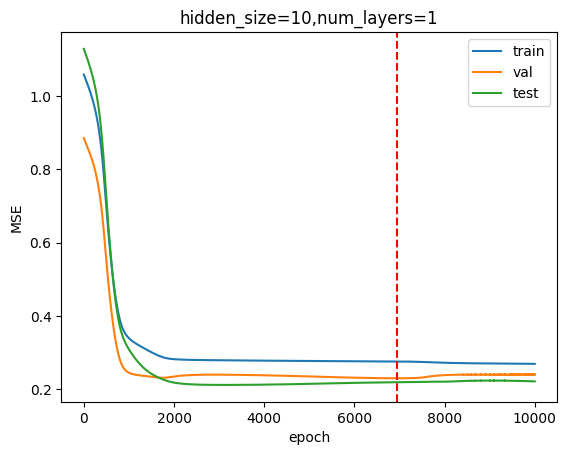

epoch: 0 train loss: 1.0108507871627808, validation loss: 0.8664513230323792
epoch: 500 train loss: 0.3184896409511566, validation loss: 0.23504002392292023
epoch: 1000 train loss: 0.29623231291770935, validation loss: 0.23498336970806122
epoch: 1500 train loss: 0.28236982226371765, validation loss: 0.2366216778755188
epoch: 2000 train loss: 0.2809443473815918, validation loss: 0.2382233738899231
epoch: 2500 train loss: 0.2802237272262573, validation loss: 0.2377246469259262
epoch: 3000 train loss: 0.2795410752296448, validation loss: 0.2372976839542389
epoch: 3500 train loss: 0.2788712680339813, validation loss: 0.23689775168895721
epoch: 4000 train loss: 0.27818605303764343, validation loss: 0.236509770154953
epoch: 4500 train loss: 0.27725929021835327, validation loss: 0.2362719178199768
epoch: 5000 train loss: 0.2755369246006012, validation loss: 0.23865170776844025
epoch: 5500 train loss: 0.27362629771232605, validation loss: 0.23889026045799255
epoch: 6000 train loss: 0.271658211

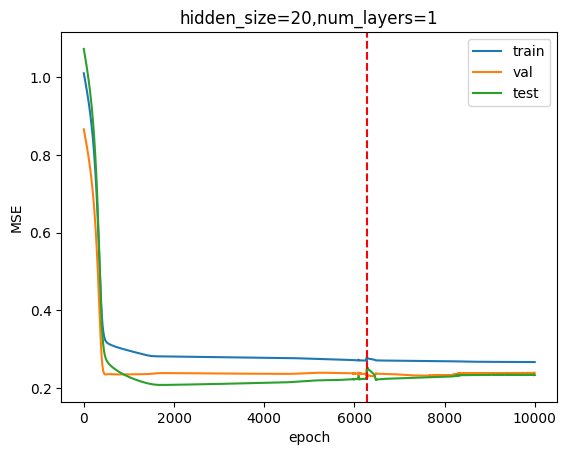

epoch: 0 train loss: 1.0130735635757446, validation loss: 0.8324113488197327
epoch: 500 train loss: 0.28441041707992554, validation loss: 0.23311226069927216
epoch: 1000 train loss: 0.2796972393989563, validation loss: 0.23733502626419067
epoch: 1500 train loss: 0.27888646721839905, validation loss: 0.23532193899154663
epoch: 2000 train loss: 0.2778993248939514, validation loss: 0.2332918345928192
epoch: 2500 train loss: 0.27623239159584045, validation loss: 0.23350515961647034
epoch: 3000 train loss: 0.2717401683330536, validation loss: 0.23859575390815735
epoch: 3500 train loss: 0.26952627301216125, validation loss: 0.23527994751930237
epoch: 4000 train loss: 0.26784470677375793, validation loss: 0.24186748266220093
epoch: 4500 train loss: 0.2670263946056366, validation loss: 0.24530448019504547
epoch: 5000 train loss: 0.26646360754966736, validation loss: 0.24663174152374268
epoch: 5500 train loss: 0.2672194540500641, validation loss: 0.24061721563339233
epoch: 6000 train loss: 0.26

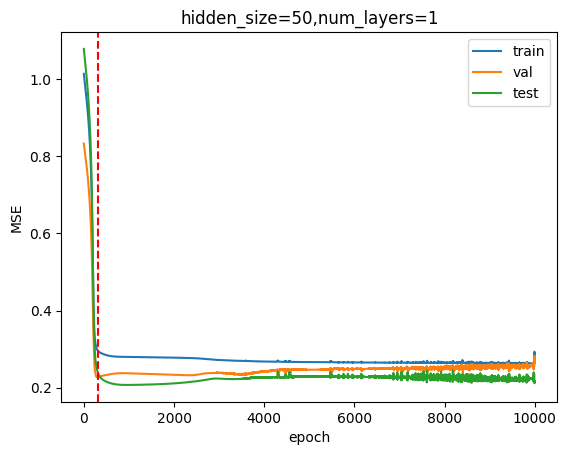

epoch: 0 train loss: 1.00448477268219, validation loss: 0.8196099996566772
epoch: 500 train loss: 0.28023436665534973, validation loss: 0.23332567512989044
epoch: 1000 train loss: 0.2787083089351654, validation loss: 0.22857992351055145
epoch: 1500 train loss: 0.2778787910938263, validation loss: 0.22698554396629333
epoch: 2000 train loss: 0.26990649104118347, validation loss: 0.24431882798671722
epoch: 2500 train loss: 0.26809751987457275, validation loss: 0.24444875121116638
epoch: 3000 train loss: 0.26767951250076294, validation loss: 0.24193380773067474
epoch: 3500 train loss: 0.2673422396183014, validation loss: 0.24517738819122314
epoch: 4000 train loss: 0.2670498788356781, validation loss: 0.2413935512304306
epoch: 4500 train loss: 0.26670828461647034, validation loss: 0.24515090882778168
epoch: 5000 train loss: 0.2661930322647095, validation loss: 0.2457025647163391
epoch: 5500 train loss: 0.26598846912384033, validation loss: 0.24460169672966003
epoch: 6000 train loss: 0.26526

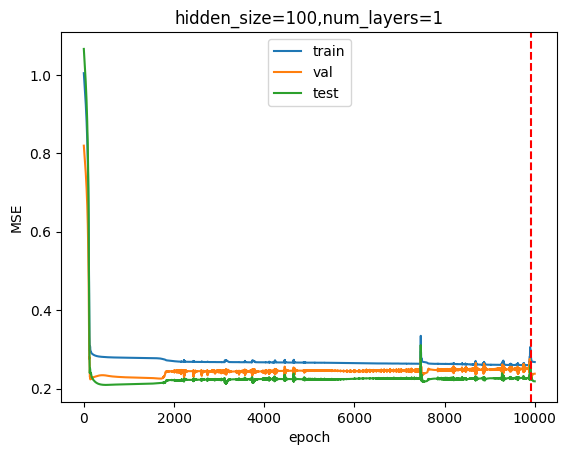

In [ ]:
hidden_size_list = [10, 20, 50, 100]
num_layers_list = [1]
ind = 0
for hidden_size in hidden_size_list:
  for num_layers in num_layers_list:
    main(hidden_size, num_layers, ind)
    ind += 1

epoch: 0 train loss: 1.0065099000930786, validation loss: 0.8320850729942322
epoch: 500 train loss: 0.27881520986557007, validation loss: 0.22888337075710297
epoch: 1000 train loss: 0.27316465973854065, validation loss: 0.24433811008930206
epoch: 1500 train loss: 0.27142131328582764, validation loss: 0.24138976633548737
epoch: 2000 train loss: 0.2748820185661316, validation loss: 0.23124556243419647
epoch: 2500 train loss: 0.2700822353363037, validation loss: 0.24365350604057312
epoch: 3000 train loss: 0.26824235916137695, validation loss: 0.2447863221168518
epoch: 3500 train loss: 0.2670813500881195, validation loss: 0.24639172852039337
epoch: 4000 train loss: 0.26664212346076965, validation loss: 0.25071465969085693
epoch: 4500 train loss: 0.2656645178794861, validation loss: 0.24620072543621063
epoch: 5000 train loss: 0.26505836844444275, validation loss: 0.2503659427165985
epoch: 5500 train loss: 0.2643471956253052, validation loss: 0.24852149188518524
epoch: 6000 train loss: 0.263

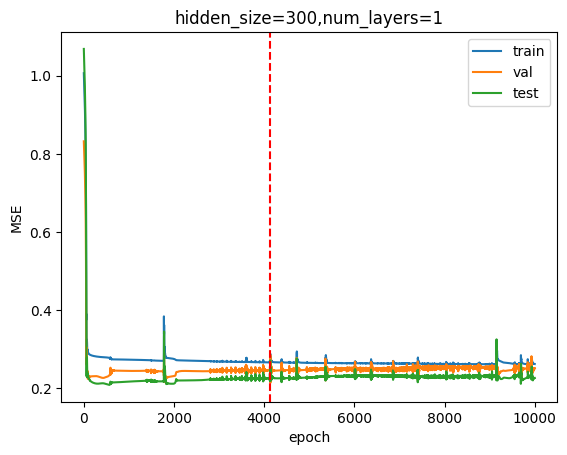

In [ ]:
main(300, 1, 4)

epoch: 0 train loss: 1.0131313800811768, validation loss: 0.8376886248588562
epoch: 500 train loss: 0.27943089604377747, validation loss: 0.23238739371299744
epoch: 1000 train loss: 0.26880449056625366, validation loss: 0.23754209280014038
epoch: 1500 train loss: 0.26422175765037537, validation loss: 0.2465498000383377
epoch: 2000 train loss: 0.25877004861831665, validation loss: 0.24748346209526062
epoch: 2500 train loss: 0.256813645362854, validation loss: 0.2500027120113373
epoch: 3000 train loss: 0.2724956274032593, validation loss: 0.2223873734474182
epoch: 3500 train loss: 0.25773128867149353, validation loss: 0.24850404262542725
epoch: 4000 train loss: 0.25062674283981323, validation loss: 0.24193093180656433
epoch: 4500 train loss: 0.25121942162513733, validation loss: 0.24826312065124512
epoch: 5000 train loss: 0.25563040375709534, validation loss: 0.24557751417160034
epoch: 5500 train loss: 0.2525513172149658, validation loss: 0.2475365549325943
epoch: 6000 train loss: 0.2513

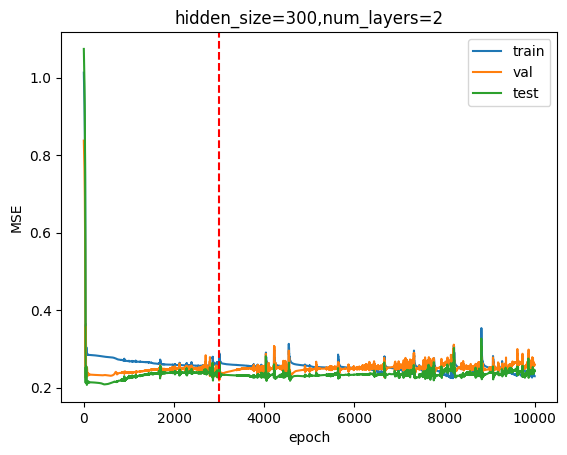

In [ ]:
res_loc = '/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic2/Hyperparameter_Performance_Analysis2.csv'
hidden_size = 300
num_layers = 2
ind = 6
num_epochs = 10000
lr = 0.0001
device = 'cuda'
split_year = 8
save_model_path = f'/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic2/model{ind}.pth'
save_plot_path = f'/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic2/model{ind}.png'
model_name = 'LSTM_periodic'

model = LSTM_periodic(1,hidden_size,num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

#RUN!
train_loss_list = []
val_loss_list = []
test_loss_list = []
best_loss = 0.6
a = time.time()
for epoch in range(num_epochs):
    train_loss, val_loss, test_loss = train_test_LSTM(model, X_sine, X_raw, split_year, optimizer, criterion, num_layers, hidden_size)
    if val_loss < best_loss:
        best_loss = val_loss
        best_test = test_loss
        best_train = train_loss
        best_epoch = epoch
        torch.save(model.state_dict(), save_model_path)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    test_loss_list.append(test_loss)
    if epoch %500 == 0:
            print(f"epoch: {epoch} train loss: {train_loss}, validation loss: {val_loss}")
b = time.time()
results = {'model':model_name, 'hidden_size':hidden_size, 'num_layers':num_layers}
results['run_time'] = b-a
results['device'] = 'T4_GPU'
results['best_epoch'] = best_epoch
results['num_epoch'] = num_epochs
results['test_loss'] = test_loss
results['val_loss'] = best_loss
results['train_loss'] = best_train

df1 = pd.DataFrame(results, index=[ind])
df1.to_csv(res_loc, mode='a', header=False)

train_loss_tens = torch.tensor(train_loss_list)
val_loss_tens = torch.tensor(val_loss_list)
test_loss_tens = torch.tensor(test_loss_list)
plt.plot(train_loss_tens.numpy(),label='train')
plt.plot(val_loss_tens.numpy(),label='val')
plt.plot(test_loss_tens.numpy(),label='test')
plt.axvline(x=best_epoch, color='r', linestyle='--')
plt.title(f'hidden_size={hidden_size},num_layers={num_layers}')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig(save_plot_path)
plt.show()